In [5]:
# importing the needed libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import numpy as np
pd.options.mode.chained_assignment = None
import warnings
warnings.filterwarnings('ignore')
import statsmodels.formula.api as smf

In [6]:
# Load the Data and take a look at it
housing = pd.read_csv("datasets/housing/housing.csv")
housing.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
5424,-118.21,33.89,45.0,1211.0,234.0,1128.0,261.0,3.4792,110700.0,<1H OCEAN
575,-117.32,34.14,32.0,1691.0,353.0,1457.0,329.0,1.8438,66600.0,INLAND
3816,-121.88,37.44,23.0,1310.0,267.0,910.0,261.0,5.3994,237900.0,<1H OCEAN
10974,-117.93,33.65,35.0,2133.0,413.0,1473.0,402.0,4.4211,215200.0,<1H OCEAN
12656,-123.10,38.79,20.0,3109.0,712.0,1643.0,638.0,2.8344,164400.0,<1H OCEAN


In [7]:
housing.info()
# 7 missing values in total_bedrooms

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
# Categorical attribute
housing.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [9]:
# Statistical metrics
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


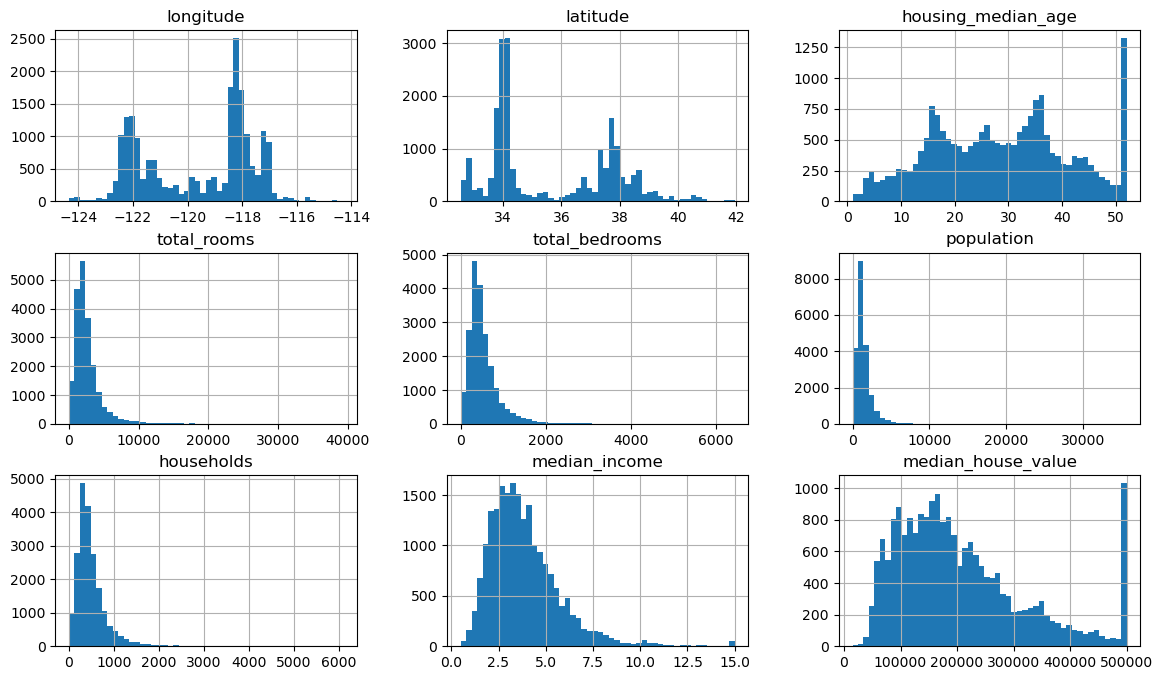

In [10]:
housing.hist(bins=50,figsize=(14,8));

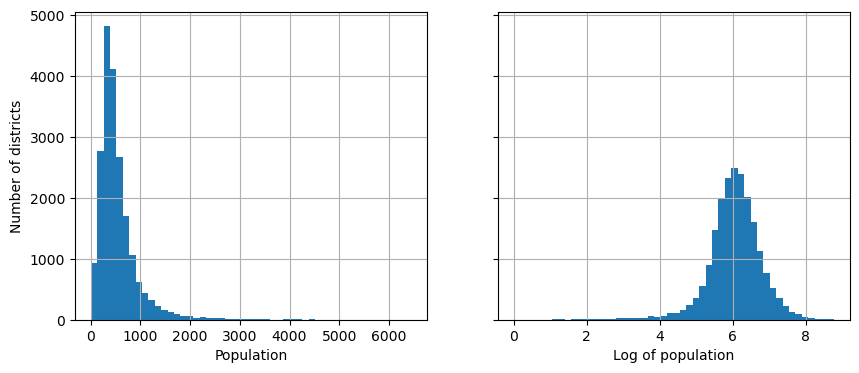

In [74]:
# transforming (Log of) the feature makes the distribution quassian - desirable
fig, axs = plt.subplots(1, 2, figsize=(10, 4), sharey=True)
housing["total_bedrooms"].hist(ax=axs[0], bins=50)
housing["total_bedrooms"].apply(np.log).hist(ax=axs[1], bins=50)
axs[0].set_xlabel("Population")
axs[1].set_xlabel("Log of population")
axs[0].set_ylabel("Number of districts")
plt.show()

In [11]:
# Looking at the correlations of different attributes with median house value
housing.corr(numeric_only=True)['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

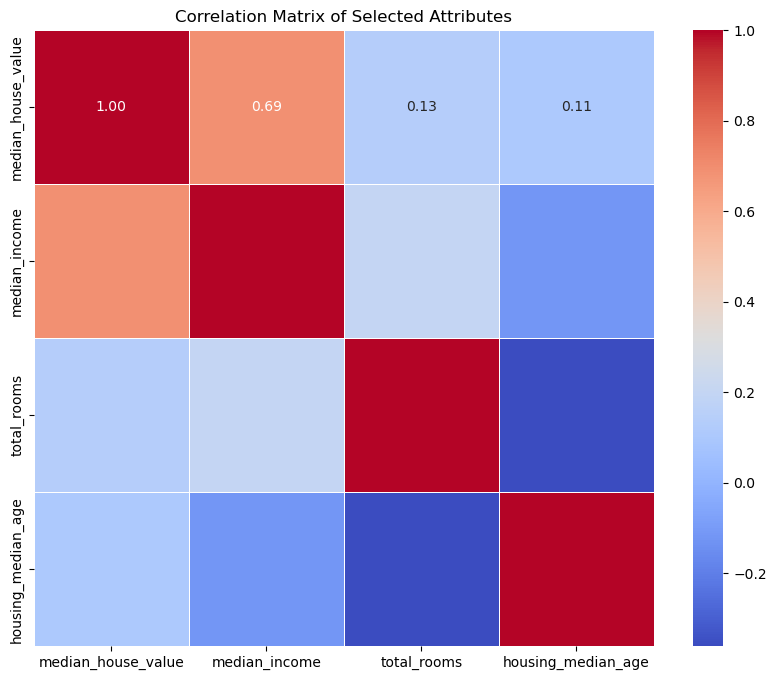

In [12]:
# Correlation Matrix of top-correlated Attributes :
selected_attributes = ['median_house_value', 'median_income',
                       'total_rooms','housing_median_age']  
selected_df = housing[selected_attributes]
correlation_matrix = selected_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Selected Attributes')
plt.show();

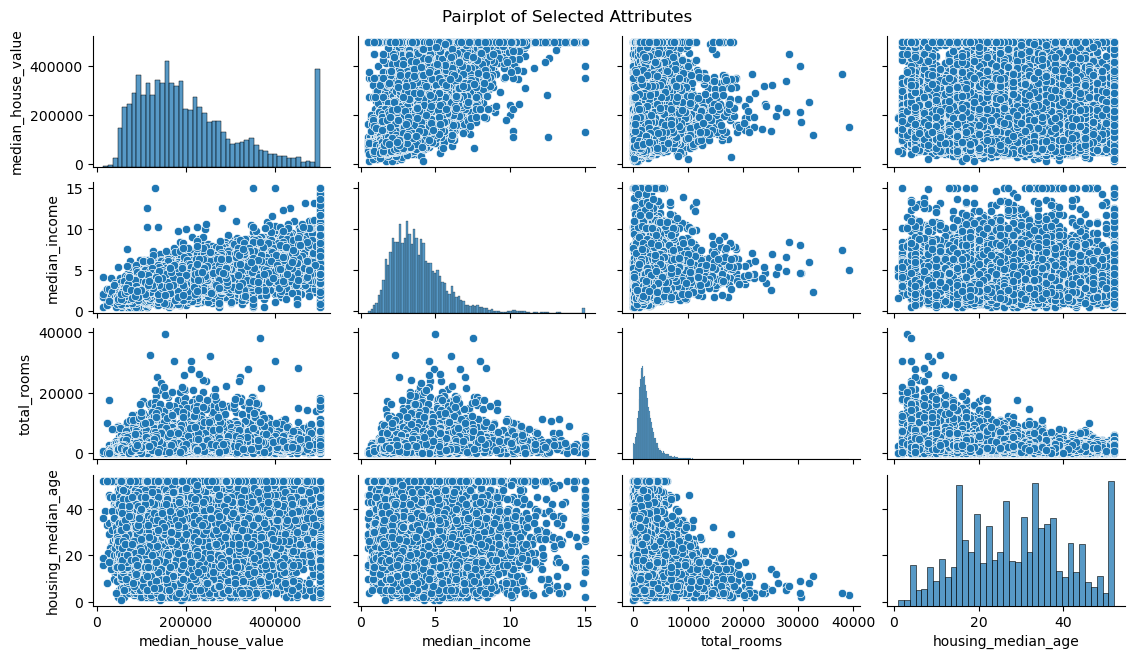

In [13]:
# Create a pairplot with scatter plots and histograms :
sns.pairplot(selected_df, height=1.6,aspect=1.8)
plt.suptitle('Pairplot of Selected Attributes', y=1.02)
plt.show()

In [14]:
# Feature combinations for better possible correlations:
housing['rooms/house']= housing['total_rooms'] / housing['households']
housing['bedrooms_ratio'] = housing['total_bedrooms'] / housing['total_rooms']
housing.corr(numeric_only=True)['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
rooms/house           0.151948
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
bedrooms_ratio       -0.255880
Name: median_house_value, dtype: float64

In [15]:
housing.sample()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms/house,bedrooms_ratio
7876,-120.87,41.54,21.0,1091.0,208.0,660.0,188.0,2.2321,34600.0,INLAND,5.803191,0.190651


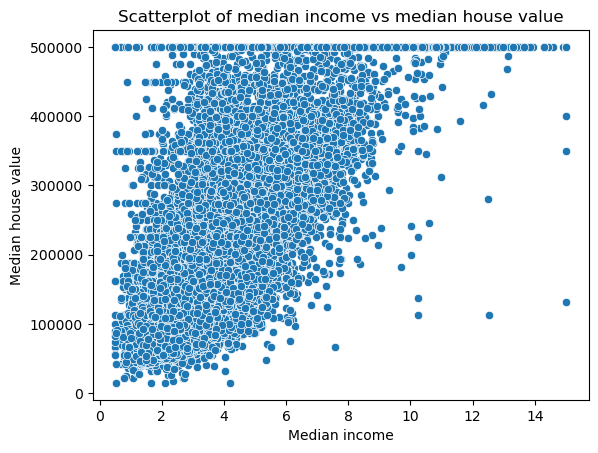

In [16]:
# Scatter plot of the most correlated predictor with the label
sns.scatterplot(x='median_income', y='median_house_value',
                data=housing)
plt.xlabel('Median income')
plt.ylabel('Median house value')
plt.title(f'Scatterplot of median income vs median house value')
plt.show();

In [17]:
reg = smf.ols('median_house_value ~ median_income',housing).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                 1.856e+04
Date:                Mon, 15 Jan 2024   Prob (F-statistic):               0.00
Time:                        10:35:41   Log-Likelihood:            -2.6325e+05
No. Observations:               20640   AIC:                         5.265e+05
Df Residuals:                   20638   BIC:                         5.265e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      4.509e+04   1322.872     34.082      0.000    4.25e+04    4.77e+04
median_income  4.179e+04    306.806    136.223      0.000    4.12e+04    4.24e+04
==============================================================================
Omnibus:                     4245.795   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9273.446
Skew:                           1.191   Prob(JB):                         0.00
Kurtosis:                       5.260   Cond. No.                         10.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

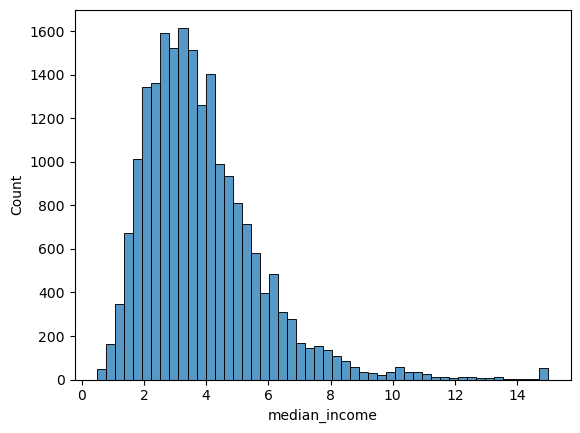

In [18]:
sns.histplot(housing.median_income,bins=50);

In [19]:
# Create income category attribute with six categories
housing['cat_income'] = pd.cut(housing['median_income'],
                              bins=[0,1.5,3,4.5,6,7.5,math.inf],
                              labels=[i for i in range(1,7)])

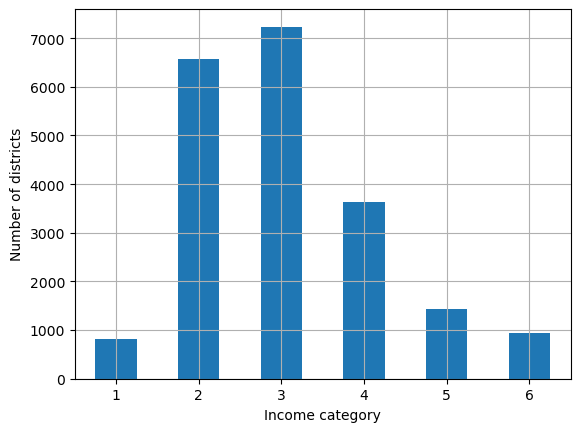

In [20]:
# and plot them
housing['cat_income'].value_counts().sort_index().plot.bar(rot=0,grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of districts")
plt.show();

In [21]:
# Using Stratified sampling split data to train set and a test set:
from sklearn.model_selection import train_test_split
strat_trainset,strat_test_set = train_test_split(
    housing,test_size=0.2,stratify=housing['cat_income'])
strat_test_set['cat_income'].value_counts().sort_index()/len(strat_test_set)

cat_income
1    0.039729
2    0.318798
3    0.350533
4    0.176357
5    0.069041
6    0.045543
Name: count, dtype: float64

In [75]:
# Compare to income proportions from the full datasat:
housing['cat_income'].value_counts().sort_index()/len(housing)

cat_income
1    0.039826
2    0.318847
3    0.350581
4    0.176308
5    0.068944
6    0.045494
Name: count, dtype: float64

In [78]:
# Sampling randomly
rand_train_set,rand_test_set = train_test_split(housing,test_size=0.2)
rand_test_set['cat_income'].value_counts().sort_index()/len(rand_test_set)

cat_income
1    0.040213
2    0.322190
3    0.349079
4    0.176599
5    0.068314
6    0.043605
Name: count, dtype: float64

In [ ]:
# Table to compare different propportions
def cat_income_proportions(data):
    return train_test_split(data,test_size=0.2)
proportion_table = pd.DataFrame({'Overall %':})

In [81]:
for i_ in (1:
    j = i_+1
j

TypeError: unsupported operand type(s) for +: 'range' and 'int'

In [22]:
# Drop labels from the training set and save the labels in a copy
strat_trainset2 = strat_trainset.drop('median_house_value',axis=1)
labels = strat_trainset['median_house_value'].copy()

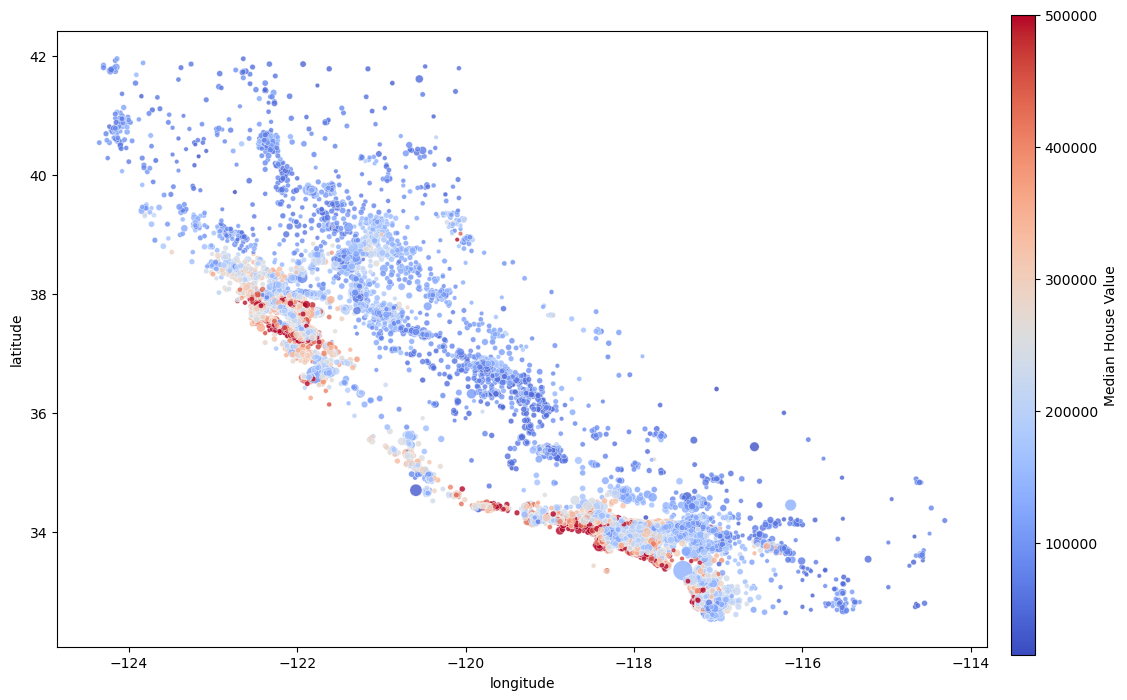

In [23]:
# Plotting Geographical data:
fig, ax = plt.subplots(figsize=(12, 8))
scatter = sns.scatterplot(housing,x='longitude',
                y='latitude',hue='median_house_value',
               alpha=0.8,size=housing['population']/100,
                          palette='coolwarm',
               sizes=(10, 200),ax=ax)
# Add a color bar using a separate Axes
cax = fig.add_axes([0.92, 0.1, 0.02, 0.8])  # Adjust these values for color bar position
norm = plt.Normalize(housing['median_house_value'].min(),
                     housing['median_house_value'].max())
sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=norm)
sm.set_array([])

cbar = plt.colorbar(sm, cax=cax)
cbar.set_label('Median House Value')
# Remove legend
scatter.legend_.remove()
plt.show()

In [24]:
# Clean up the Data:
# Count of missing values in training and test sets
strat_trainset['total_bedrooms'].isnull().sum(),strat_test_set['total_bedrooms'].isnull().sum()

(166, 41)

In [25]:
# Imputation of missing values in total_bedrooms-replace with median:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')

In [26]:
strat_trainset2.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms/house,bedrooms_ratio,cat_income
17617,-119.27,34.28,52.0,2239.0,420.0,941.0,397.0,4.125,NEAR OCEAN,5.639798,0.187584,3
6079,-118.18,33.94,43.0,2724.0,612.0,2340.0,570.0,2.700,<1H OCEAN,4.778947,0.224670,2


In [27]:
# Simple imputer only works on numerical attributes so subset the numerical 
# columns :
strat_trainset2_num = strat_trainset2.select_dtypes(include=np.number)
strat_trainset2_num.sample()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms/house,bedrooms_ratio
13064,-117.84,33.89,24.0,3935.0,625.0,1912.0,593.0,5.7951,6.63575,0.158831


In [28]:
imputer.fit(strat_trainset2_num)

SimpleImputer(strategy='median')

In [29]:
# Sanity check
imputer.statistics_.round(1)

array([-1.185e+02,  3.430e+01,  2.900e+01,  2.137e+03,  4.360e+02,
        1.167e+03,  4.100e+02,  3.500e+00,  5.200e+00,  2.000e-01])

In [30]:
strat_trainset2_num.median().values.round(1)

array([-1.185e+02,  3.430e+01,  2.900e+01,  2.137e+03,  4.360e+02,
        1.167e+03,  4.100e+02,  3.500e+00,  5.200e+00,  2.000e-01])

In [31]:
# Transform the data set and turn it into a dataframe
X = imputer.transform(strat_trainset2_num)

In [32]:
strat_trainset2_num_imputed=pd.DataFrame(
    X,columns=strat_trainset2_num.columns,index=strat_trainset2_num.index)

In [33]:
# Check if missing values were all replaced successfully:
strat_trainset2_num_imputed['total_bedrooms'].isnull().sum()

0

In [34]:
# Now dealing with the categorical attribute
strat_trainset2_cat = strat_trainset2[['ocean_proximity']]
strat_trainset2_cat.sample(3)

,ocean_proximity
13151,NEAR OCEAN
14001,<1H OCEAN
9972,<1H OCEAN


In [35]:
# transform using one hot encoding and store it in a sparse matrix
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
strat_trainset2_cat_hotcoded = encoder.fit_transform(strat_trainset2_cat)

In [36]:
# List of the categories to be encoded:
encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [37]:
strat_trainset2_cat_hotcoded.toarray()

array([[0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [38]:
# Feature scaling using Standardization: (x-mean)/std
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
strat_trainset2_num_imputed_stdscaled = std_scaler.fit_transform(
    strat_trainset2_num_imputed
)

In [39]:
# Turn it into a dataframe
strat_trainset2_num_imputed_stdscaled = pd.DataFrame(
    strat_trainset2_num_imputed_stdscaled,
    columns=strat_trainset2_num_imputed.columns,
    index = strat_trainset2_num_imputed.index
)

In [40]:
strat_trainset2_num_imputed_stdscaled.sample(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms/house,bedrooms_ratio
8102,0.599124,-0.854605,0.588907,-0.279845,-0.473023,-0.533256,-0.426331,0.666694,0.248954,-0.796202
17510,-1.885037,2.499454,-0.443731,-1.138900,-1.134620,-1.206310,-1.242099,-1.447410,0.292500,3.549934
9863,-1.241549,0.808410,0.271172,-0.062127,0.091697,-0.233441,0.207579,0.551325,-0.467466,0.298701


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


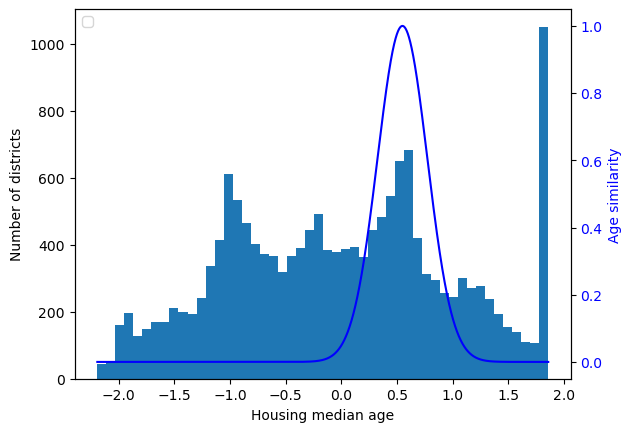

In [41]:
from sklearn.metrics.pairwise import rbf_kernel
age_similarity_to35 = rbf_kernel(
    strat_trainset2_num_imputed_stdscaled[['housing_median_age']],
[[0.5]],gamma=0.2)

housing_ages = np.linspace(strat_trainset2_num_imputed_stdscaled['housing_median_age'].min(),
                  strat_trainset2_num_imputed_stdscaled['housing_median_age'].max(),
                          len(strat_trainset2_num_imputed_stdscaled)).reshape(-1,1)
rbf_55 = rbf_kernel(housing_ages,[[0.55]],gamma=10)

fig,ax1 = plt.subplots()
ax1.set_xlabel("Housing median age")
ax1.set_ylabel("Number of districts")
ax1.hist(strat_trainset2_num_imputed_stdscaled['housing_median_age'],
         bins=50)
ax2 = ax1.twinx()
color = "blue"
ax2.plot(housing_ages, rbf_55, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylabel("Age similarity", color=color)

plt.legend(loc="upper left")
plt.show();

In [42]:
# Customized transformer using k-means clustering algorithm to locate clusters in data
# Need review
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.cluster import KMeans
class ValueCluster(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0):
        self.n_clusters = n_clusters
        self.gamma = gamma
    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters, n_init=10)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self
    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)
    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} " for i in range(self.n_clusters)]

In [43]:
labels.head()

17617    349000.0
6079     165000.0
5279     192200.0
18595    123600.0
45       182300.0
Name: median_house_value, dtype: float64

In [44]:
# Building the Pipeline to transform the data in the right order 
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler

def ratio_name(function_transformer, feature_names_in):
    return ['ratio']

def feature_ratio(column):
    return column[:,[0]] / column[:,[1]]
def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy='median'),
        FunctionTransformer(feature_ratio,feature_names_out=ratio_name)
    )
log_pipeline =  make_pipeline(SimpleImputer(strategy='median'),
                              FunctionTransformer(np.log,feature_names_out ="one-to-one"),
                              StandardScaler())
cluster_similarity = ValueCluster(n_clusters=10,gamma=1.)
number_pipeline = make_pipeline(SimpleImputer(strategy='mean'),
                               StandardScaler())
categorical_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown='ignore')
)

In [45]:
# Performing all the transformations 
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector, make_column_transformer
data_processing = ColumnTransformer([
    ('bedroom_ratio',ratio_pipeline(),['total_bedrooms','total_rooms']),
    ('rooms_per_house',ratio_pipeline(),['total_rooms','households']),
    ('persons_per_house',ratio_pipeline(),["population", "households"]),
    ('log',log_pipeline,["total_bedrooms", "total_rooms", "population",
                               "households", "median_income"]),
    ('category',categorical_pipeline,make_column_selector(dtype_include=object)),
    ('age',number_pipeline,['housing_median_age'])])

In [46]:
housing_final = data_processing.fit_transform(strat_trainset2)

In [47]:
housing_final.shape

(16512, 14)

In [48]:
data_processing.get_feature_names_out()

array(['bedroom_ratio__ratio', 'rooms_per_house__ratio',
       'persons_per_house__ratio', 'log__total_bedrooms',
       'log__total_rooms', 'log__population', 'log__households',
       'log__median_income', 'category__ocean_proximity_<1H OCEAN',
       'category__ocean_proximity_INLAND',
       'category__ocean_proximity_ISLAND',
       'category__ocean_proximity_NEAR BAY',
       'category__ocean_proximity_NEAR OCEAN', 'age__housing_median_age'],
      dtype=object)

In [50]:
# Select and train a model
from sklearn.linear_model import LinearRegression
linear_regression = make_pipeline(data_processing,LinearRegression())
linear_regression.fit(strat_trainset2,labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('bedroom_ratio',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x7f7c4032b670>,
                                                                                       func=<function feature_ratio at 0x7f7c4032b790>))]),
                                                  ['total_bedrooms',
                                                   'total_rooms']),
                                                 ('rooms_per_hous...
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f7c402f8cd0>),
                                                 ('age',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['housing_median_age'])])),
                ('linearregression', LinearRegression())])

In [52]:
# Testing Linear Regression model on the training set and calculating predictions
lr_predictions = linear_regression.predict(strat_trainset2)
lr_predictions[:7].round(-2)

array([301700., 170100., 143400., 260700., 255900., 235000., 314300.])

In [55]:
# Comparing with the data labels
labels.iloc[:7].values

array([349000., 165000., 192200., 123600., 182300., 145900., 186100.])

In [86]:
# Error ratios
error_ratios = (lr_predictions[:7].round(-2) / labels.iloc[:7].values) - 1
print(", ".join([f"{100 * ratio:.1f}%" for ratio in error_ratios]))

-13.6%, 3.1%, -25.4%, 110.9%, 40.4%, 61.1%, 68.9%


In [57]:
# RMSE performance measure calculation
from sklearn.metrics import mean_squared_error
lr_rmse = mean_squared_error(labels,lr_predictions,squared=False)
lr_rmse
# This is clear evidence of model underfitting

72349.42501722169

In [59]:
# Training Decision Tree Regressor model : able to account for complex non-linearities in data
from sklearn.tree import DecisionTreeRegressor
dt_regressor = make_pipeline(data_processing,
                            DecisionTreeRegressor())

In [60]:
dt_regressor.fit(strat_trainset2,labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('bedroom_ratio',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x7f7c4032b670>,
                                                                                       func=<function feature_ratio at 0x7f7c4032b790>))]),
                                                  ['total_bedrooms',
                                                   'total_rooms']),
                                                 ('rooms_per_hous...
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f7c402f8cd0>),
                                                 ('age',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['housing_median_age'])])),
                ('decisiontreeregressor', DecisionTreeRegressor())])

In [61]:
# Evaluating on training set
dt_predictions = dt_regressor.predict(strat_trainset2)

In [63]:
# RMSE performance measure calculation
dt_rmse = mean_squared_error(labels,dt_predictions,
                            squared=False)
dt_rmse
# This is likely a case of overfitting as error = 0 !!!

0.0

In [88]:
from sklearn.model_selection import cross_val_score
dtv_rmse = -cross_val_score(dt_regressor,strat_trainset2,
                           labels,scoring='neg_root_mean_squared_error',
                          cv=10)

In [89]:
pd.Series(dtv_rmse).describe()

count       10.000000
mean     81808.253743
std       2745.136139
min      77752.817386
25%      79882.666323
50%      81279.155279
75%      84217.671970
max      85345.246433
dtype: float64

In [67]:
# Training Random Forest Regressor model : 
# random forests work by training many decision trees on random subsets of the features,
# then averaging out their predictions
from sklearn.ensemble import RandomForestRegressor
rf_regressor = make_pipeline(data_processing,RandomForestRegressor())

In [68]:
rf_regressor.fit(strat_trainset2,labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('bedroom_ratio',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x7f7c4032b670>,
                                                                                       func=<function feature_ratio at 0x7f7c4032b790>))]),
                                                  ['total_bedrooms',
                                                   'total_rooms']),
                                                 ('rooms_per_hous...
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f7c402f8cd0>),
                                                 ('age',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['housing_median_age'])])),
                ('randomforestregressor', RandomForestRegressor())])

In [69]:
# Evaluating on training set
rf_predictions = rf_regressor.predict(strat_trainset2)

In [71]:
# RMSE performance measure calculation
rf_rmse = mean_squared_error(labels,rf_predictions,
                            squared=False)
rf_rmse
# Much better than linear regression but can be improved Further!

22182.17317117859

In [94]:
rf_rmse = -cross_val_score(rf_regressor,strat_trainset2,
                           labels,scoring='neg_root_mean_squared_error',
                          cv=10)

In [95]:
pd.Series(rf_rmse).describe()

count       10.000000
mean     58951.592879
std       1733.228221
min      56235.397857
25%      57530.161783
50%      58873.983718
75%      60538.028773
max      61267.907615
dtype: float64

In [103]:
# getting pipelines ready for grid search
from sklearn.pipeline import Pipeline
gs_pipeline = Pipeline([('data_processing',data_processing),
                        ('rf_regressor',RandomForestRegressor())])
                        
param_grid = [
    {'rf_regressor__max_features':[4,6,8]}
]                    

In [104]:
from sklearn.model_selection import GridSearchCV
search_grid = GridSearchCV(gs_pipeline,param_grid,
                          cv=3,scoring='neg_root_mean_squared_error')
search_grid.fit(strat_trainset2,labels)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('data_processing',
                                        ColumnTransformer(transformers=[('bedroom_ratio',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer',
                                                                                          FunctionTransformer(feature_names_out=<function ratio_name at 0x7f7c4032b670>,
                                                                                                              func=<function feature_ratio at 0x7f7c4032b790>))]),
                                                                         ['total_bedrooms',
                                                                          'total...
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f7c402f8cd0>),
                                                                        ('age',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['housing_median_age'])])),
                                       ('rf_regressor',
                                        RandomForestRegressor())]),
             param_grid=[{'rf_regressor__max_features': [4, 6, 8]}],
             scoring='neg_root_mean_squared_error')

In [105]:
# The best hyperparameter combination found:
search_grid.best_params_

{'rf_regressor__max_features': 6}

In [108]:
search_grid.best_score_

-58644.58262727823

In [111]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
param_distributions = {'rf_regressor__max_features':randint(low=2,high=40)}
random_search = RandomizedSearchCV(gs_pipeline,
                                   param_distributions=param_distributions,
                                  n_iter=10,cv=3,scoring='neg_root_mean_squared_error')
random_search.fit(strat_trainset2,labels)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('data_processing',
                                              ColumnTransformer(transformers=[('bedroom_ratio',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('functiontransformer',
                                                                                                FunctionTransformer(feature_names_out=<function ratio_name at 0x7f7c4032b670>,
                                                                                                                    func=<function feature_ratio at 0x7f7c4032b790>))]),
                                                                               ['total_bedrooms',...
                                                                               <sklearn.compose._column_transformer.make_column_selector object at 0x7f7c402f8cd0>),
                                                                              ('age',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer()),
                                                                                               ('standardscaler',
                                                                                                StandardScaler())]),
                                                                               ['housing_median_age'])])),
                                             ('rf_regressor',
                                              RandomForestRegressor())]),
                   param_distributions={'rf_regressor__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f7c44766a30>},
                   scoring='neg_root_mean_squared_error')

In [118]:
feature_importance = random_search.best_estimator_['rf_regressor'].feature_importances_.round(2)
feature_importance

array([0.1 , 0.07, 0.12, 0.03, 0.03, 0.03, 0.03, 0.36, 0.02, 0.15, 0.  ,
       0.01, 0.01, 0.06])

In [120]:
sorted(zip(feature_importance,data_processing.get_feature_names_out()),
      reverse=True)

[(0.36, 'log__median_income'),
 (0.15, 'category__ocean_proximity_INLAND'),
 (0.12, 'persons_per_house__ratio'),
 (0.1, 'bedroom_ratio__ratio'),
 (0.07, 'rooms_per_house__ratio'),
 (0.06, 'age__housing_median_age'),
 (0.03, 'log__total_rooms'),
 (0.03, 'log__total_bedrooms'),
 (0.03, 'log__population'),
 (0.03, 'log__households'),
 (0.02, 'category__ocean_proximity_<1H OCEAN'),
 (0.01, 'category__ocean_proximity_NEAR OCEAN'),
 (0.01, 'category__ocean_proximity_NEAR BAY'),
 (0.0, 'category__ocean_proximity_ISLAND')]

In [121]:
strat_test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms/house,bedrooms_ratio,cat_income
16641,-118.43,34.26,30.0,1246.0,373.0,1990.0,369.0,3.5104,140900.0,<1H OCEAN,3.376694,0.299358,3
18426,-117.98,33.67,7.0,5664.0,1174.0,2493.0,1101.0,5.8252,264700.0,<1H OCEAN,5.144414,0.207274,4
9167,-117.39,34.09,10.0,5736.0,945.0,3528.0,932.0,4.3958,130700.0,INLAND,6.154506,0.164749,3
16051,-121.85,38.00,26.0,3364.0,570.0,1806.0,566.0,4.2647,133400.0,INLAND,5.943463,0.169441,3
619,-117.97,33.66,14.0,6090.0,1338.0,1974.0,1248.0,2.8061,180300.0,<1H OCEAN,4.879808,0.219704,2


In [124]:
x_testset = strat_test_set.drop('median_house_value',axis=1)
y_testset = strat_test_set['median_house_value'].copy()
y_testset.sample()

7041    179200.0
Name: median_house_value, dtype: float64

In [126]:
model = random_search.best_estimator_

In [127]:
predictions = model.predict(x_testset)

In [129]:
rmse_final = mean_squared_error(y_testset,predictions,
                               squared=False)
rmse_final

58276.52845823796